<a href="https://colab.research.google.com/github/bhavrish/CVD-Classifer/blob/main/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('Cluster0')
df.head()

,Unnamed: 0,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
1,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
2,6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
3,22,32,23046,1,158,90.0,145,85,2,2,0,0,1,1
4,24,35,16608,1,170,68.0,150,90,3,1,0,0,1,1


In [ ]:
df_feat = df.iloc[:,0:-1]

In [ ]:
df_targ = df.iloc[:, -1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_feat, df_targ, test_size = .33, random_state = 44)

In [ ]:
print(X_train, y_test)

      Unnamed: 0     id    age  gender  ...  gluc  smoke  alco  active
275         2644   3725  19484       1  ...     1      0     0       1
1132       10956  15678  19817       1  ...     1      0     0       1
6340       63825  91125  21311       1  ...     1      0     0       1
6138       61713  88101  16035       1  ...     1      0     0       1
1848       18562  26507  21911       1  ...     1      0     0       1
...          ...    ...    ...     ...  ...   ...    ...   ...     ...
571         5523   7855  19692       1  ...     1      0     0       1
1197       11665  16668  20558       1  ...     2      0     0       1
2801       28123  40208  23241       1  ...     1      0     0       1
3491       35214  50308  22688       1  ...     1      0     0       1
5908       59408  84822  23421       1  ...     1      0     0       1

[4668 rows x 13 columns] 2857    0
3224    0
3795    1
6308    1
846     1
       ..
6196    1
4619    1
1245    0
1365    0
151     1
Name: cardio

In [ ]:
group = [1, 3, 5, 7, 9, 11, 13, 15, 17,19,21]
error = []

for i in group:
  neigh = KNeighborsClassifier(n_neighbors = i)
  neigh.fit(X_train, y_train)  
  error.append(neigh.score(X_test, y_test))

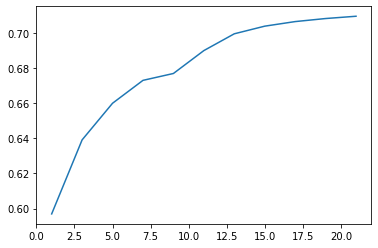

In [ ]:
plt.plot(group, error) ## this is accuracy